<a href="https://colab.research.google.com/github/Mizoroki-Heck/Statistics/blob/main/Time_series/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B(%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/sample_data/Поисковые системы в России - по датам 2015-01-01-2019-12-01.csv',)

In [ ]:
data = data.drop(['Rambler, Визиты', 'Rambler, Доля', 'Mail.ru, Визиты', 'Mail.ru, Доля', 'Google, Визиты', 'Google, Доля', 'Яндекс, Доля', 'Остальные, Визиты', 'Остальные, Доля'], axis=1)
data

,Время,"Яндекс, Визиты"
0,2015-01-01 - 2015-01-01,67054003
1,2015-01-02 - 2015-01-02,85701308
2,2015-01-03 - 2015-01-03,91585678
3,2015-01-04 - 2015-01-04,94632940
4,2015-01-05 - 2015-01-05,97029139
...,...,...
1791,2019-11-27 - 2019-11-27,187331090
1792,2019-11-28 - 2019-11-28,185336946
1793,2019-11-29 - 2019-11-29,173040652
1794,2019-11-30 - 2019-11-30,150539309


Смотрим есть ли пропуски

In [ ]:
data.isna().sum()

Время             0
Яндекс, Визиты    0
dtype: int64

In [ ]:
for i in range(len(data['Время'])):
  data['Время'][i] = data['Время'][i][:10]
data

<ipython-input-31-11e2ecb73aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Время'][i] = data['Время'][i][:10]


,Время,"Яндекс, Визиты"
0,2015-01-01,67054003
1,2015-01-02,85701308
2,2015-01-03,91585678
3,2015-01-04,94632940
4,2015-01-05,97029139
...,...,...
1791,2019-11-27,187331090
1792,2019-11-28,185336946
1793,2019-11-29,173040652
1794,2019-11-30,150539309


In [ ]:
data['Время'] = pd.to_datetime(data['Время'])
data.set_index(data.columns[0], inplace=True)

<Axes: xlabel='Время'>

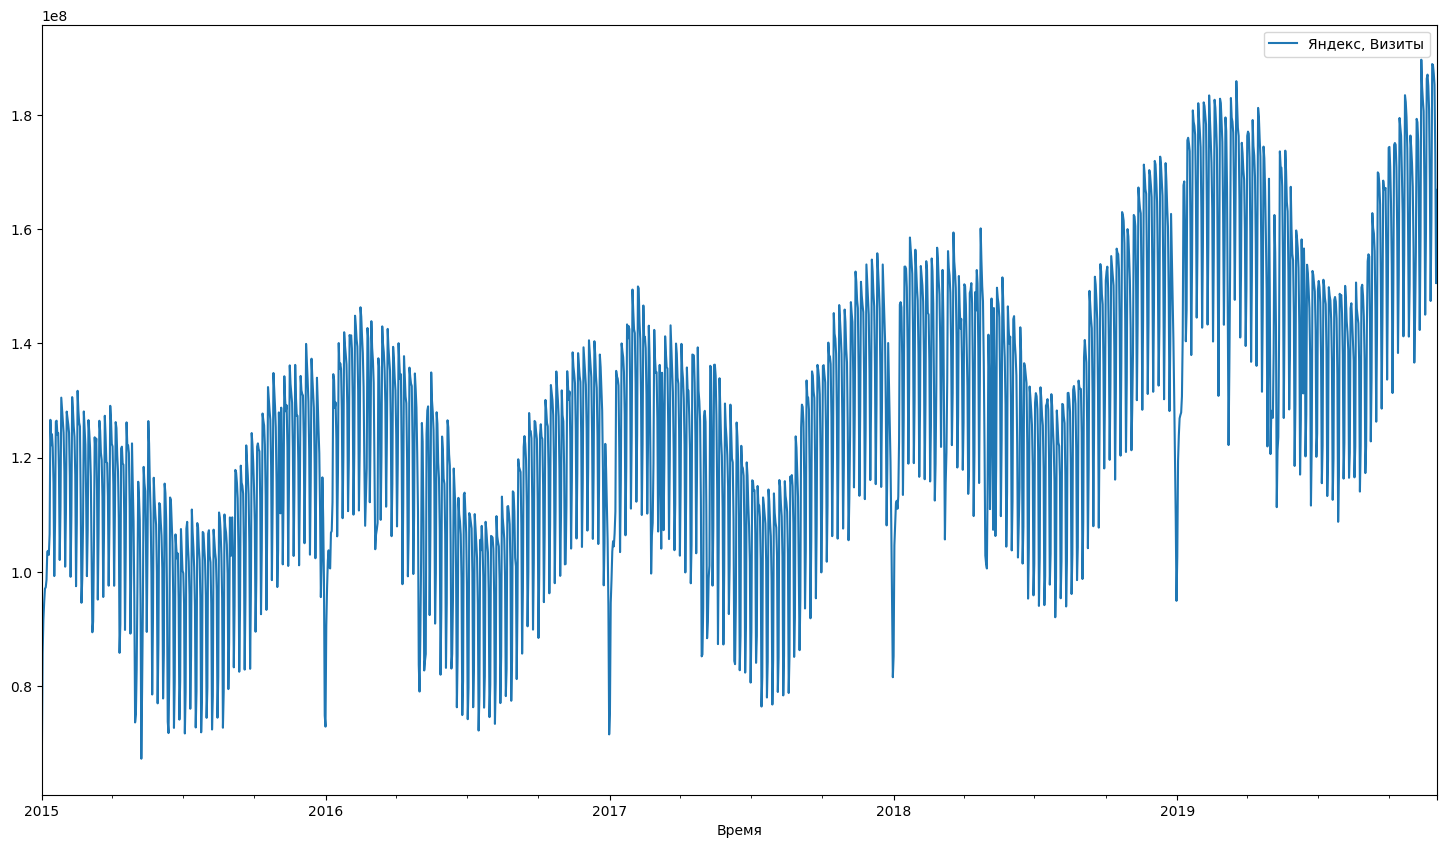

In [ ]:
data.plot(figsize=(18,10))

Автокорреляция показывает недельный, и годовой характер

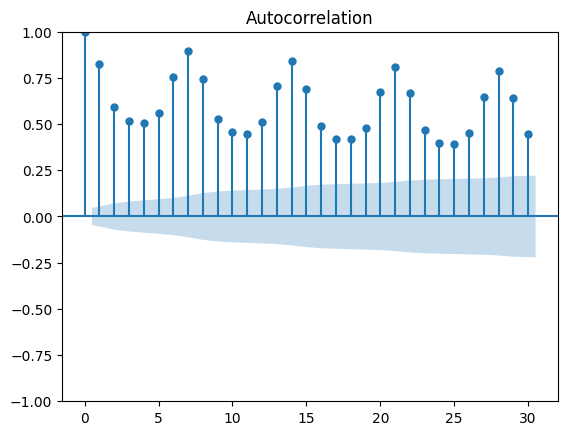

[1.         0.82497622 0.59277674 0.51430664 0.50481155 0.56027964
 0.75713855 0.89605406 0.74139951 0.52793486 0.45536471 0.4486591
 0.50855111 0.70429997 0.84044374 0.69077182 0.48719746 0.42045404
 0.41812746 0.47810655 0.67236785 0.80968874 0.66561299 0.46595958
 0.39883894 0.39410916 0.45275885 0.64736161 0.78642818 0.64380708
 0.4467038  0.38171557 0.37948949]


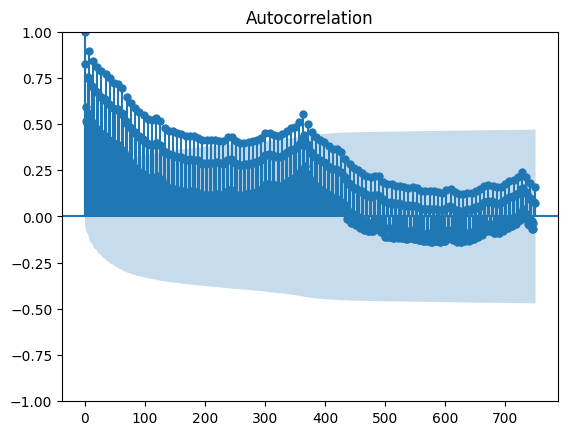

[1.         0.82497622 0.59277674 0.51430664 0.50481155 0.56027964
 0.75713855 0.89605406 0.74139951 0.52793486 0.45536471 0.4486591
 0.50855111 0.70429997 0.84044374 0.69077182 0.48719746 0.42045404
 0.41812746 0.47810655 0.67236785 0.80968874 0.66561299 0.46595958
 0.39883894 0.39410916 0.45275885 0.64736161 0.78642818 0.64380708
 0.4467038  0.38171557 0.37948949]


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(data, lags=30)
plt.show()
print(sm.tsa.acf(data))

fig = tsaplots.plot_acf(data, lags=750)
plt.show()
print(sm.tsa.acf(data))

Проверим на стационарность, я использовал критерий Дики — Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(data)
print('adf: ', test[0])
print('p-values: ', test[1])
print('Critical_values: ', test[4])
if test[0] > test[4]['5%']:
  print('есть единичные корни, ряд не стационарен')
else:
   print('единичных корней нет, ряд стационарен')

adf:  -1.7335240137680659
p-values:  0.4139278892143743
Critical_values:  {'1%': -3.4340457100503534, '5%': -2.8631724504188356, '10%': -2.5676390661481077}
есть единичные корни, ряд не стационарен


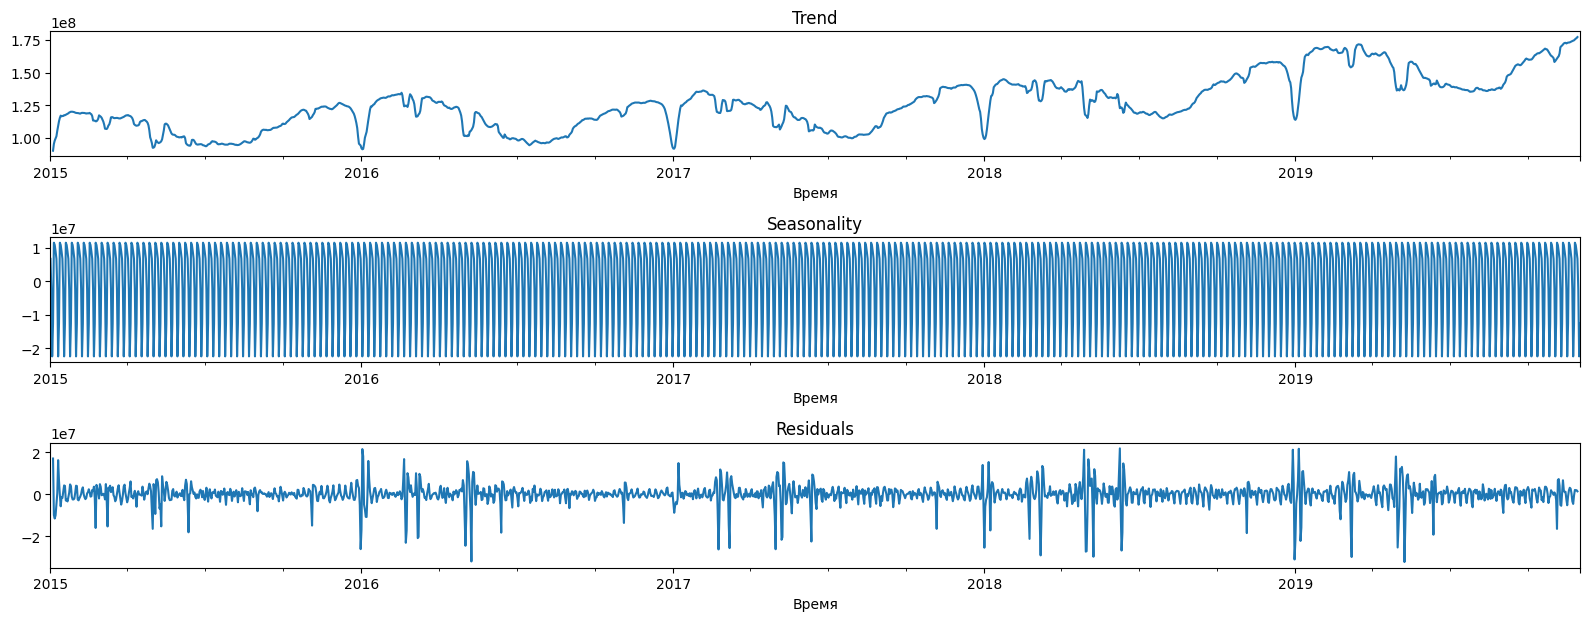

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data)
plt.figure(figsize=(16, 10))
plt.subplot(511)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(512)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(513)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Видим возрастающий на протяжении анализируемого периода тренд. Сезонность, которую будем учитывать в моделях - недельная.

# 1) Линейная регрессия

Добавлю новые признаки, день недели, год и предыдущие значения

In [ ]:
def features(df, lags, rolling_mean_size):
  df['day_of_week'] = df.index.dayofweek
  df['year'] = df.index.year

  for lag in range(1, lags + 1):
        df['lag_{}'.format(lag)] = df['Яндекс, Визиты'].shift(lag)

  df['rolling_mean'] = df['Яндекс, Визиты'].shift().rolling(rolling_mean_size).mean()
  return df

features(data, 182, 182)

data = pd.get_dummies(data, columns=['day_of_week'], prefix='day_of_week', drop_first=True)
data = pd.get_dummies(data, columns=['year'], prefix='year', drop_first=True)

<ipython-input-37-377ceed4f2e2>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lag_{}'.format(lag)] = df['Яндекс, Визиты'].shift(lag)
<ipython-input-37-377ceed4f2e2>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lag_{}'.format(lag)] = df['Яндекс, Визиты'].shift(lag)
<ipython-input-37-377ceed4f2e2>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [ ]:
data.dropna(inplace=True)
data

,"Яндекс, Визиты",lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,lag_51,lag_52,lag_53,lag_54,lag_55,lag_56,lag_57,lag_58,lag_59,lag_60,lag_61,lag_62,lag_63,lag_64,lag_65,lag_66,lag_67,lag_68,lag_69,lag_70,lag_71,lag_72,lag_73,lag_74,lag_75,lag_76,lag_77,lag_78,lag_79,lag_80,lag_81,lag_82,lag_83,lag_84,lag_85,lag_86,lag_87,lag_88,lag_89,lag_90,lag_91,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100,lag_101,lag_102,lag_103,lag_104,lag_105,lag_106,lag_107,lag_108,lag_109,lag_110,lag_111,lag_112,lag_113,lag_114,lag_115,lag_116,lag_117,lag_118,lag_119,lag_120,lag_121,lag_122,lag_123,lag_124,lag_125,lag_126,lag_127,lag_128,lag_129,lag_130,lag_131,lag_132,lag_133,lag_134,lag_135,lag_136,lag_137,lag_138,lag_139,lag_140,lag_141,lag_142,lag_143,lag_144,lag_145,lag_146,lag_147,lag_148,lag_149,lag_150,lag_151,lag_152,lag_153,lag_154,lag_155,lag_156,lag_157,lag_158,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,lag_169,lag_170,lag_171,lag_172,lag_173,lag_174,lag_175,lag_176,lag_177,lag_178,lag_179,lag_180,lag_181,lag_182,rolling_mean,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2016,year_2017,year_2018,year_2019
Время,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-02,99720860,100193466.0,103754545.0,107471424.0,80867746.0,74080933.0,95004811.0,103187752.0,102313737.0,104096336.0,106528624.0,80684027.0,72629958.0,95923214.0,105234658.0,109137184.0,112596181.0,112997032.0,81975651.0,71722200.0,73717785.0,96897170.0,108993851.0,113749783.0,115429035.0,85758573.0,77783433.0,100550688.0,106280382.0,108753891.0,111814027.0,112015980.0,87512568.0,76933057.0,99833116.0,108240763.0,110140679.0,112710319.0,116456448.0,91803547.0,78480775.0,99694281.0,110151951.0,115251986.0,122365329.0,126385301.0,104210910.0,89448867.0,104786975.0,114111977.0,115542290.0,118360007.0,93720347.0,79273913.0,67231336.0,94462000.0,109011896.0,113193247.0,115759159.0,97367303.0,82799428.0,75038388.0,73587476.0,94900833.0,108827291.0,115075121.0,122476512.0,99775817.0,89149622.0,111438009.0,120780020.0,122134816.0,122005399.0,126159586.0,104303477.0,89794350.0,110023600.0,118739545.0,118970231.0,121904562.0,121524145.0,90808150.0,85778126.0,109251492.0,117564645.0,120369606.0,125152278.0,126205585.0,110134920.0,97531764.0,115284888.0,121949756.0,122388448.0,126572349.0,129059933.0,108559131.0,97545226.0,113219473.0,119036896.0,119234006.0,123903723.0,127313884.0,106710025.0,95562227.0,113086374.0,119591096.0,120800459.0,124706792.0,126441385.0,106626283.0,95112463.0,114365840.0,123318764.0,121148885.0,123543555.0,103979237.0,91259577.0,89385996.0,102197339.0,116644720.0,121730749.0,124516724.0,126551105.0,107186983.0,99215797.0,112856806.0,122229975.0,125177944.0,128070290.0,108200110.0,98728893.0,94551646.0,112457597.0,125439043.0,126100995.0,128238161.0,131689227.0,108686119.0,97455989.0,116841505.0,123620884.0,125471113.0,128426485.0,130584875.0,109857460.0,99100119.0,116702380.0,124317739.0,125779793.0,126892621.0,128047549.0,110401452.0,100875949.0,117567557.0,124361449.0,126301558.0,128404226.0,130491230.0,111368659.0,102050510.0,117817521.0,124325418.0,123998099.0,126454130.0,126293297.0,108770011.0,99234001.0,115551282.0,121791677.0,124086088.0,122152573.0,126608070.0,106567079.0,102954258.0,103655710.0,103520262.0,98551515.0,97253570.0,97029139.0,94632940.0,91585678.0,85701308.0,67054003.0,1.085026e+08,0,0,1,0,0,0,0,0,0,0
2015-07-03,94397660,99720860.0,100193466.0,103754545.0,107471424.0,80867746.0,74080933.0,95004811.0,103187752.0,

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=43, shuffle=False)
X_train = train.drop(columns=['Яндекс, Визиты'], axis=1)
y_train = train['Яндекс, Визиты']
x_test = test.drop(columns=['Яндекс, Визиты'], axis=1)
y_test = test['Яндекс, Визиты']

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(x_test)

train_predict = linreg.predict(X_train)

mae_train = mean_absolute_error(y_train, train_predict)
print(f"Mean Absolute Error на тренировочных данных: {mae_train}")

test_predict = linreg.predict(x_test)

mae_test = mean_absolute_error(y_test, test_predict)
print(f"Mean Absolute Error на тестовых данных: {mae_test}")

Mean Absolute Error на тренировочных данных: 3071614.6165435957
Mean Absolute Error на тестовых данных: 3627021.56745497


# 2) SARIMA

In [ ]:
%pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00


In [ ]:
sarimax_model = auto_arima(data['Яндекс, Визиты'], seasonal=True, m = 7)

In [ ]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1614
Model:             SARIMAX(5, 1, 3)x(2, 0, [1, 2], 7)   Log Likelihood              -27492.560
Date:                                Sun, 24 Dec 2023   AIC                          55013.119
Time:                                        03:13:01   BIC                          55088.521
Sample:                                    07-02-2015   HQIC                         55041.107
                                         - 12-01-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.139e+05   9.24e-06   1.23e+10      0.000    1.14e+05    1.14e+05
ar.L1          0.3200      0.204      1.571      0.116      -0.079       0.719
ar.L2         -0.8032      0.194     -4.141      0.000      -1.183      -0.423
ar.L3         -0.4209      0.264     -1.595      0.111      -0.938       0.096
ar.L4         -0.1248      0.067     -1.866      0.062      -0.256       0.006
ar.L5         -0.2491      0.067     -3.699      0.000      -0.381      -0.117
ma.L1         -0.2838      0.207     -1.372      0.170      -0.689       0.122
ma.L2          0.4823      0.188      2.568      0.010       0.114       0.850
ma.L3          0.4497      0.198      2.269      0.023       0.061       0.838
ar.S.L7        0.3853      0.434      0.888      0.375      -0.466       1.236
ar.S.L14       0.6026      0.432      1.394      0.163      -0.245       1.450
ma.S.L7       -0.2768      0.421     -0.657      0.511      -1.103       0.549
ma.S.L14      -0.5717      0.387     -1.477      0.140      -1.330       0.187
sigma2       4.59e+13   1.24e-13    3.7e+26      0.000    4.59e+13    4.59e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              5335.68
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.21
Prob(H) (two-sided):                  0.03   Kurtosis:                        11.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.27e+41. Standard errors may be unstable.
"""

In [ ]:
model = SARIMAX(data['Яндекс, Визиты'], order=(5, 1, 3), seasonal_order=(2, 0, 2, 7))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Сделал предсказание на 30 дней

In [ ]:
forecast = results.get_forecast(steps=30)
predicted_values = forecast.predicted_mean

In [ ]:
print(predicted_values)

2019-12-02    1.932963e+08
2019-12-03    1.910213e+08
2019-12-04    1.881303e+08
2019-12-05    1.857609e+08
2019-12-06    1.758016e+08
2019-12-07    1.554684e+08
2019-12-08    1.665790e+08
2019-12-09    1.920672e+08
2019-12-10    1.913465e+08
2019-12-11    1.887105e+08
2019-12-12    1.859543e+08
2019-12-13    1.767227e+08
2019-12-14    1.570038e+08
2019-12-15    1.675797e+08
2019-12-16    1.924661e+08
2019-12-17    1.914164e+08
2019-12-18    1.891347e+08
2019-12-19    1.868912e+08
2019-12-20    1.775741e+08
2019-12-21    1.575865e+08
2019-12-22    1.680244e+08
2019-12-23    1.926845e+08
2019-12-24    1.919360e+08
2019-12-25    1.898743e+08
2019-12-26    1.875448e+08
2019-12-27    1.782826e+08
2019-12-28    1.583092e+08
2019-12-29    1.686618e+08
2019-12-30    1.934726e+08
2019-12-31    1.925369e+08
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(data['Яндекс, Визиты'], results.fittedvalues[:'2019-12-02'])
print(f'Mean squared Error: {mse}')

mae = mean_absolute_error(data['Яндекс, Визиты'], results.fittedvalues[:'2019-12-02'])
print(f'Mean absolute Error: {mae}')

Mean squared Error: 40851428623641.4
Mean absolute Error: 3619276.8252922622


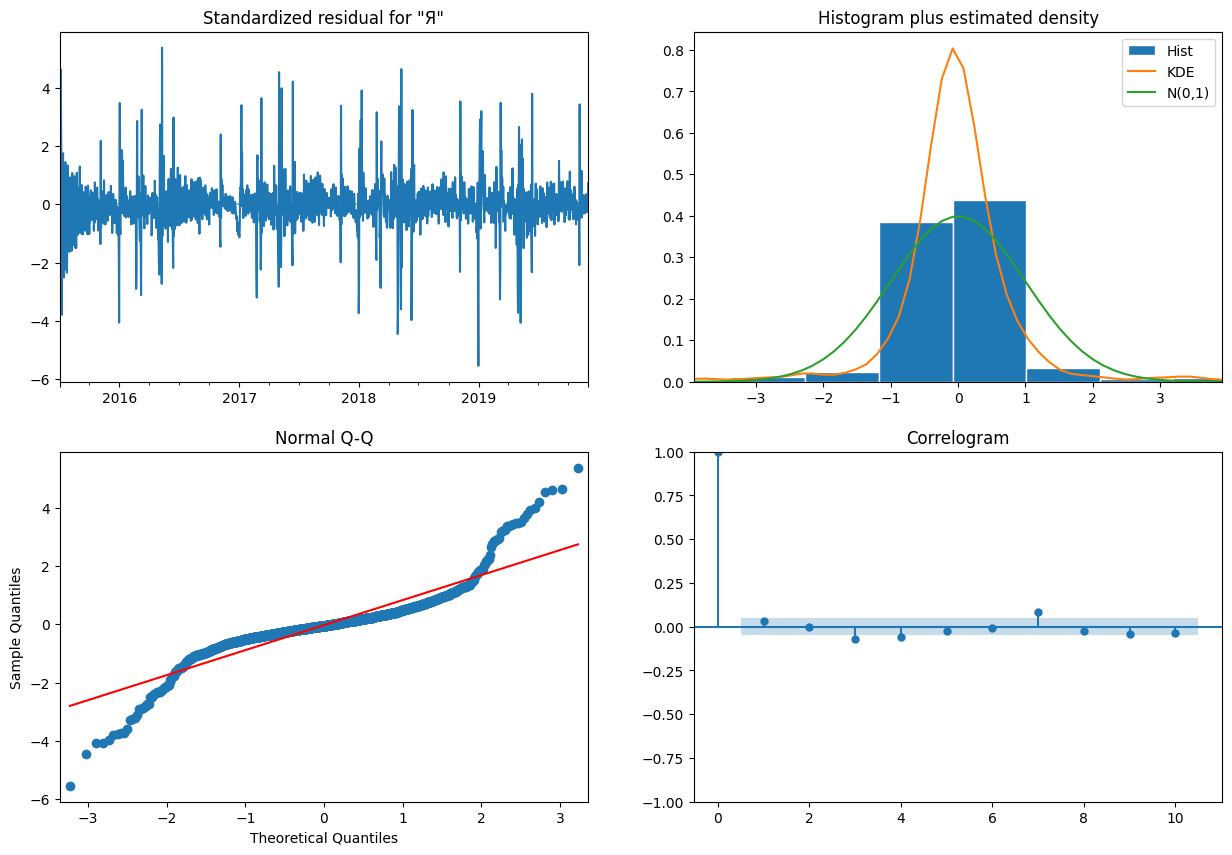

In [ ]:
results.plot_diagnostics(figsize=(15,10));

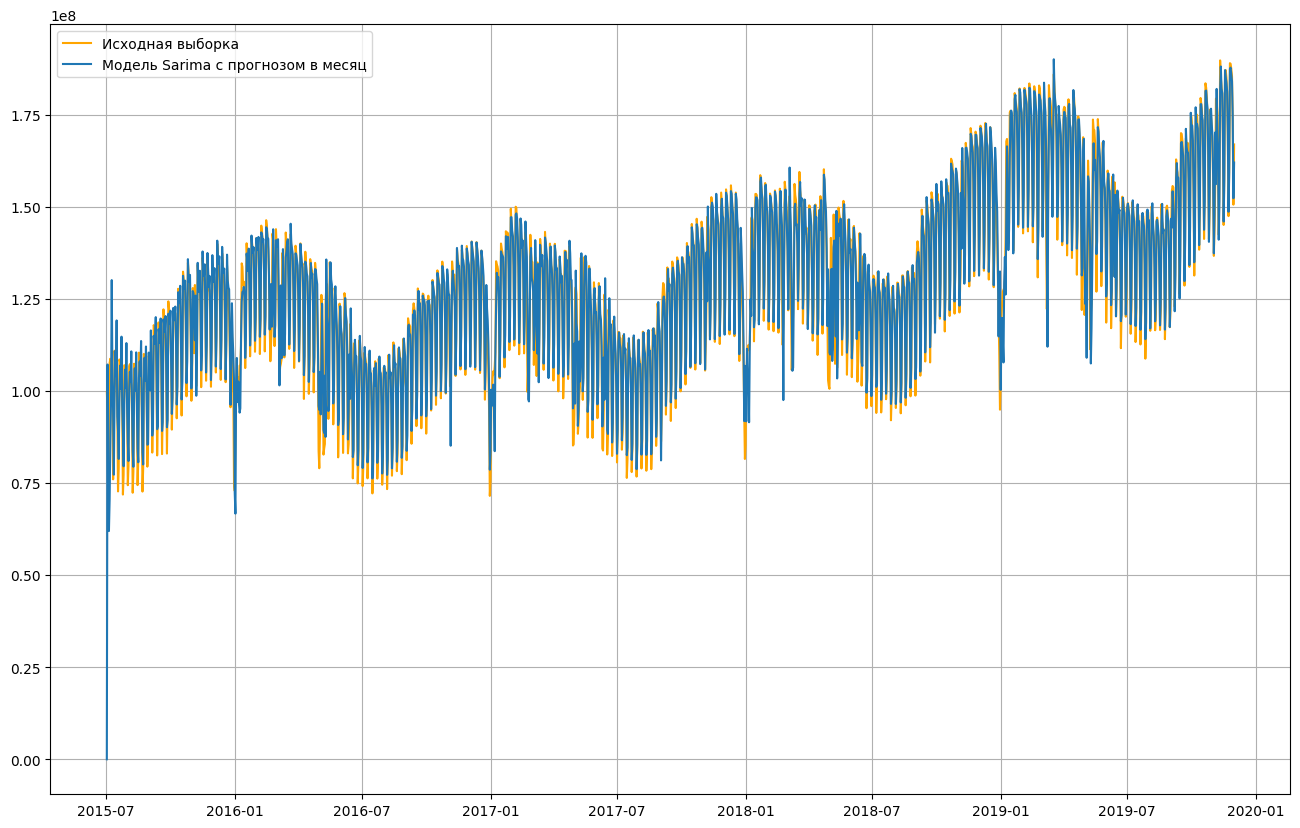

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(data['Яндекс, Визиты'], label='Исходная выборка', color='orange')
plt.plot(results.fittedvalues, label='Модель Sarima с прогнозом в месяц')
plt.legend()
plt.grid(True)

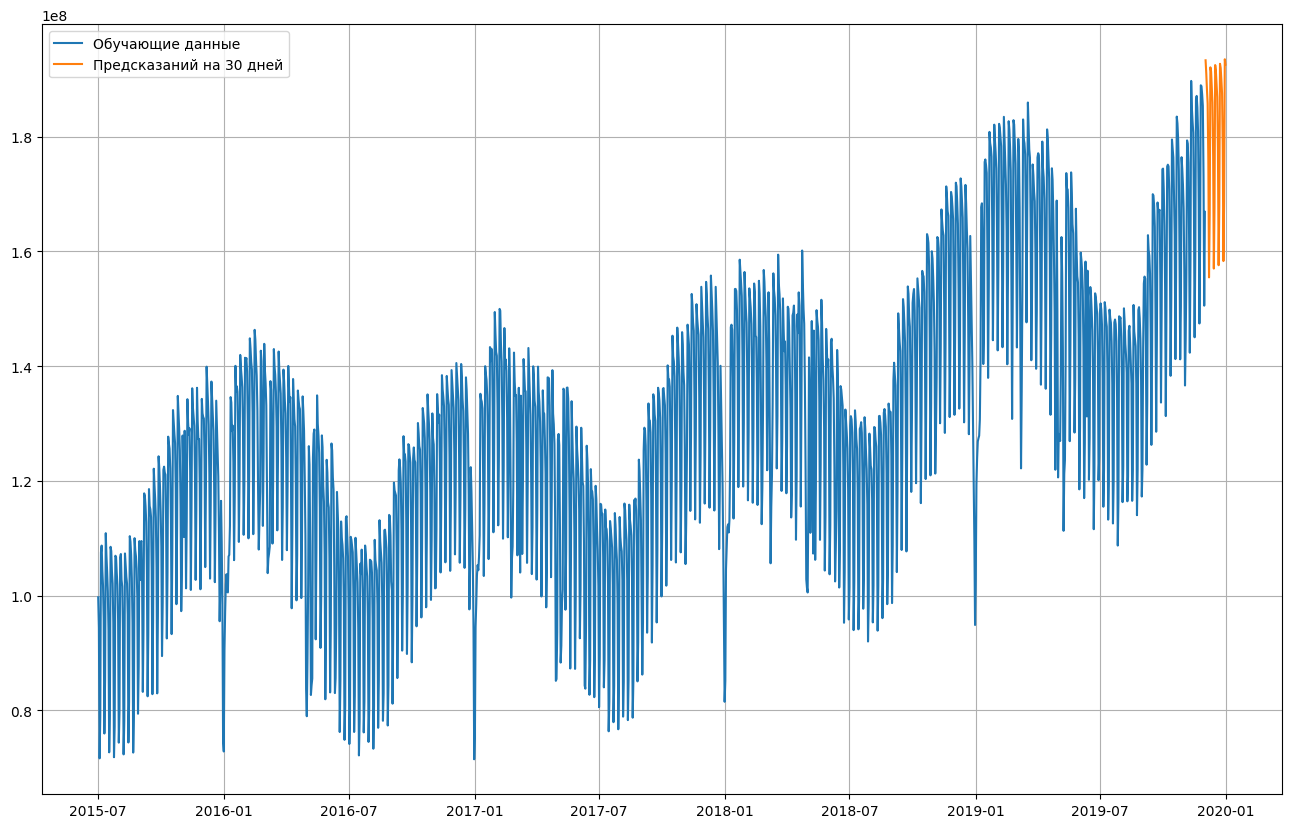

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(data['Яндекс, Визиты'].index, data['Яндекс, Визиты'], label='Обучающие данные')
plt.plot(predicted_values.index, predicted_values, label='Предсказаний на 30 дней')
plt.legend()
plt.grid(True)

В данной работе были использованы две различные модели — линейная регрессия и SARIMA (Seasonal Autoregressive Integrated Moving Average) — с целью анализа и прогнозирования временных рядов. Каждая из моделей имеет свои особенности и применение, а их сравнение может предоставить более полное представление о производительности в конкретном контексте.

Результаты моделирования были оценены с использованием метрик, таких как Mean Absolute Error (MAE), чтобы оценить точность предсказаний на тренировочных и, при необходимости, тестовых данных.

В обоих случаях, результаты моделирования могут быть дополнительно улучшены дополнительной тщательной настройкой параметров и использованием дополнительных признаков, если таковые доступны.

Линейная регрессия показывает адекватные результаты, целевая переменная имеет высокие значения, по этому и оценка модели около 3 миллионов, не является чем то аномальным.
У SARIMA такая же ситуация оценка модели около 3 миллионов, но SARIMA показывает результат чуть лучше регрессии.